In [4]:
from classy import Class, CosmoComputationError
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# $\Sigma$ implementation

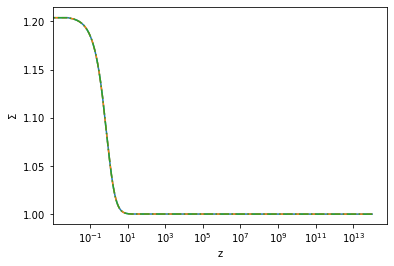

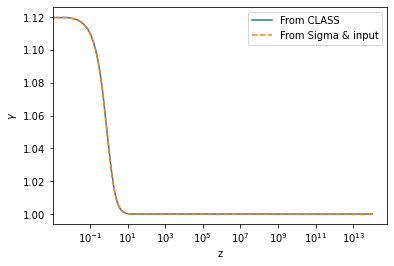

In [13]:
parameters_smg = [0.2, 0.3]

params = {'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 2e-9,
          'n_s': 0.965, 
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk',
          'l_max_scalars': 2500,
          'Omega_Lambda': 0, 
          'Omega_fld': 0, 
          'Omega_smg': -1, 
          'gravity_model': 'mgclass_fs', 
          'expansion_model': 'lcdm',
          'parameters_smg': str(parameters_smg).strip('[]'),
          'expansion_smg': '0.7',
          'use_Sigma': 'y'}

cosmo = Class()
cosmo.set(params)
cosmo.compute()
b = cosmo.get_background()

z = b['z']
mu = b['mgclass_dmu'] + 1
gamma = b['mgclass_dgamma'] + 1
Sigma = b['mgclass_dSigma'] + 1
Sigma_input = 1 + parameters_smg[1] * b['(.)rho_smg'] / b['(.)rho_crit']

plt.semilogx(z, Sigma, label='From CLASS')
plt.semilogx(z, Sigma_input, '--', label='From input & formula')
plt.semilogx(z, 0.5 * mu * (1 + gamma), '-.', label=r'$\mu (1 + \gamma) / 2$')
plt.xlabel('z')
plt.ylabel(r'$\Sigma$')
plt.show()

plt.semilogx(z, gamma, label='From CLASS')
plt.semilogx(z, 2 * Sigma_input / mu - 1, '--', label='From Sigma & input')
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\gamma$')
plt.show()

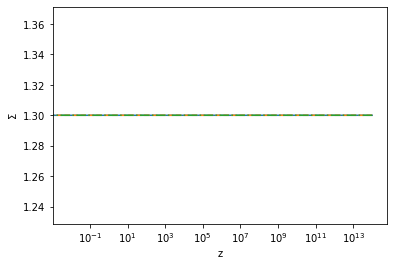

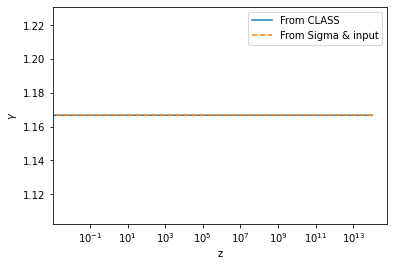

In [17]:
parameters_smg = [0.2, 0.3]

params = {'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 2e-9,
          'n_s': 0.965, 
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk',
          'l_max_scalars': 2500,
          'Omega_Lambda': 0, 
          'Omega_fld': 0, 
          'Omega_smg': -1, 
          'gravity_model': 'mgclass_const', 
          'expansion_model': 'lcdm',
          'parameters_smg': str(parameters_smg).strip('[]'),
          'expansion_smg': '0.7',
          'use_Sigma': 'y'}

cosmo = Class()
cosmo.set(params)
cosmo.compute()
b = cosmo.get_background()

z = b['z']
mu = b['mgclass_dmu'] + 1
gamma = b['mgclass_dgamma'] + 1
Sigma = b['mgclass_dSigma'] + 1
Sigma_input = (parameters_smg[1] + 1) * np.ones_like(z)

plt.semilogx(z, Sigma, label='From CLASS')
plt.semilogx(z, Sigma_input, '--', label='From input & formula')
plt.semilogx(z, 0.5 * mu * (1 + gamma), '-.', label=r'$\mu (1 + \gamma) / 2$')
plt.xlabel('z')
plt.ylabel(r'$\Sigma$')
plt.show()

plt.semilogx(z, gamma, label='From CLASS')
plt.semilogx(z, 2 * Sigma_input / mu - 1, '--', label='From Sigma & input')
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\gamma$')
plt.show()

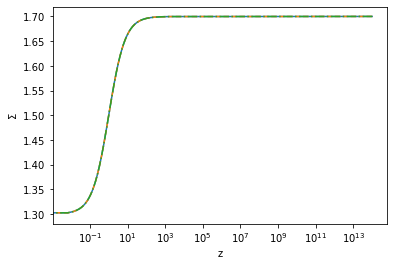

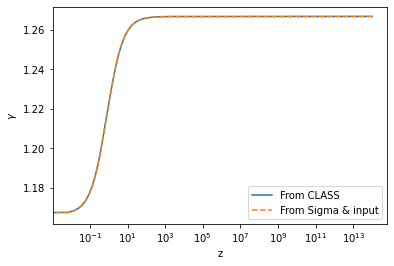

In [19]:
parameters_smg = [0.2, 0.3, 0.3, 0.4]

params = {'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 2e-9,
          'n_s': 0.965, 
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk',
          'l_max_scalars': 2500,
          'Omega_Lambda': 0, 
          'Omega_fld': 0, 
          'Omega_smg': -1, 
          'gravity_model': 'mgclass_cpl', 
          'expansion_model': 'lcdm',
          'parameters_smg': str(parameters_smg).strip('[]'),
          'expansion_smg': '0.7',
          'use_Sigma': 'y'}

cosmo = Class()
cosmo.set(params)
cosmo.compute()
b = cosmo.get_background()

z = b['z']
mu = b['mgclass_dmu'] + 1
gamma = b['mgclass_dgamma'] + 1
Sigma = b['mgclass_dSigma'] + 1
Sigma_input = 1 + parameters_smg[2] + (1 - 1/(1+z)) * parameters_smg[3]

plt.semilogx(z, Sigma, label='From CLASS')
plt.semilogx(z, Sigma_input, '--', label='From input & formula')
plt.semilogx(z, 0.5 * mu * (1 + gamma), '-.', label=r'$\mu (1 + \gamma) / 2$')
plt.xlabel('z')
plt.ylabel(r'$\Sigma$')
plt.show()

plt.semilogx(z, gamma, label='From CLASS')
plt.semilogx(z, 2 * Sigma_input / mu - 1, '--', label='From Sigma & input')
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\gamma$')
plt.show()

# $\mu(z)$ splined

In [25]:
def plot_dmu(mu_nodes=[0.5, 1.0, 1.5, 2], perts=False, prior=False,
             high_sigma_satisfy_prior=False, sigma_p1=False, save_npz=False,
            plot_Sigma=False, lcdm=False, add_pk_arr=None, sigma_nodes=None):
    mu_nodes = mu_nodes.copy()
    z_anchor = 5
    
    # Nodes need to be ordered in decreasing z
    z_nodes = [0.24, 0.53, 0.83, 1.5, z_anchor, z_anchor+0.1][::-1]
    # Add anchor in array of mu
    mu_nodes.insert(0, 0)
    mu_nodes.insert(0, 0)

    if not np.any(mu_nodes) and lcdm is True:
        sigma_nodes = mu_nodes
    elif sigma_nodes is not None:
        sigma_nodes = sigma_nodes.copy()
        sigma_nodes.insert(0, 0)
        sigma_nodes.insert(0, 0)
    elif high_sigma_satisfy_prior:
        sigma_nodes = list(np.array(sigma_nodes) / 2 + 1)
    else: 
        sigma_nodes = mu_nodes
        
    if sigma_p1:
        sigma_nodes = list(np.array(sigma_nodes) + 1)

    params_cosmo = {'H0': 67.5,
              'omega_b': 0.022,
              'omega_cdm': 0.122,
              'tau_reio': 0.06,
              'A_s': 2e-9,
              'n_s': 0.965}
    
    params_hc = {'Omega_Lambda': 0, 
              'Omega_fld': 0, 
              'Omega_smg': -1, 
              'expansion_model': 'lcdm',
              'expansion_smg': '0.7',
              'gravity_model': 'mgclass_spline', 
              'mgclass_spline_z_anchor_smg': z_anchor,
              'mgclass_spline_size_smg': len(z_nodes) - 2,
              'mgclass_spline_z_smg': str(z_nodes[2:]).strip('[]'),
              'mgclass_spline_dmu_smg': str(mu_nodes[2:]).strip('[]'),
              # dsigma spline not implemented yet
              'mgclass_spline_dsigma_smg':  str(sigma_nodes[2:]).strip('[]'),
              'use_Sigma': 'y'}
    if perts:
        params_cosmo.update({'output': 'mPk, mTk',
                       'non linear': 'halofit'})
    if prior:
        params_hc.update({'use_mgclass_prior': 'y'})

    cosmo = Class()
    cosmo.set(params_cosmo)
    cosmo.set(params_hc)
    cosmo.compute()
    b = cosmo.get_background()


    z = b['z']
    dmu = b['mgclass_dmu']
    dsigma = b['mgclass_dSigma']
    if (high_sigma_satisfy_prior is not True) and np.all(sigma_nodes == mu_nodes):
        assert np.all(dmu == dsigma)
        
        
    # Cubic
    dmu_python = interp1d(z_nodes, mu_nodes, kind='cubic',
                          fill_value='extrapolate', bounds_error=False)(z)
    dmu_python[z > z_nodes[0]] = 0

    # Quadratic
    dmu_python2 = interp1d(z_nodes, mu_nodes, kind='quadratic',
                          fill_value='extrapolate', bounds_error=False)(z)
    dmu_python2[z > z_nodes[0]] = 0

    sel = z < z_anchor + 1
    plt.scatter(z_nodes, mu_nodes)
    plt.plot(z[sel], dmu[sel], label='From CLASS (_SPLINE_NATURAL_ cubic?)')
#     plt.plot(z[sel], dsigma[sel], '--', label=r'From CLASS (_SPLINE_NATURAL_ cubic?) $\Sigma$')
#     plt.plot(z[sel], dmu_python[sel], '--', label='Python (cubic)')
#     plt.plot(z[sel], dmu_python2[sel], '-.', label='Python (quadratic)')
    plt.xlabel('z')
    plt.ylabel(r'$\mu - 1$')
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes[2:]}')
    plt.show()
    plt.close()
    
    if plot_Sigma:
#         plt.scatter(z_nodes, sigma_nodes)
        plt.plot(z[sel], dsigma[sel], '--', label=r'From CLASS (_SPLINE_NATURAL_ cubic?)')
        plt.xlabel('z')
        plt.ylabel(r'$\Sigma - 1$')
        plt.legend()
        plt.title(f'dsigma_nodes: {sigma_nodes[2:]}')
        plt.show()
        plt.close()        
    
    if perts:
        cosmo_lcdm = Class()
        cosmo_lcdm.set(params_cosmo)
        cosmo_lcdm.compute()
        
        k = np.logspace(-3, 0)
        pk = np.array([cosmo.pk(ki, 0) for ki in k])
        pk_lcdm = np.array([cosmo_lcdm.pk(ki, 0) for ki in k])
        
        plt.loglog(k, pk)
        plt.loglog(k, pk_lcdm, '--k', label=r'$\Lambda$CDM')
        if add_pk_arr is not None:
            plt.loglog(add_pk_arr[0], add_pk_arr[1], '-.', label=r'input')
        plt.xlabel('k')
        plt.ylabel(r'$P(k)$')
        plt.legend()
        plt.title(f'mu_nodes: {mu_nodes}')
        plt.show()
        plt.close()
        
        cosmo_lcdm.struct_cleanup()
    cosmo.struct_cleanup()

In [8]:
def save_dmu_npz(mu_nodes, fname, lcdm=True, sigma_nodes=None):
    mu_nodes = mu_nodes.copy()
    z_anchor = 5
    
    # Nodes need to be ordered in decreasing z
    z_nodes = [0.24, 0.53, 0.83, 1.5][::-1]
    if not np.any(mu_nodes) and lcdm is True:
        sigma_nodes = mu_nodes
    elif sigma_nodes is not None:
        sigma_nodes = sigma_nodes.copy()
    else:
        sigma_nodes = list(np.array(mu_nodes) / 2 + 1)

    params = {'H0': 67.5,
              'omega_b': 0.022,
              'omega_cdm': 0.122,
              'tau_reio': 0.06,
              'A_s': 2e-9,
              'n_s': 0.965, 
              'Omega_Lambda': 0, 
              'Omega_fld': 0, 
              'Omega_smg': -1, 
              'expansion_model': 'lcdm',
              'expansion_smg': '0.7',
              'gravity_model': 'mgclass_spline', 
              'mgclass_spline_z_anchor_smg': z_anchor,
              'mgclass_spline_size_smg': len(z_nodes),
              'mgclass_spline_z_smg': str(z_nodes).strip('[]'),
              'mgclass_spline_dmu_smg': str(mu_nodes).strip('[]'),
              # dsigma spline not implemented yet
              'mgclass_spline_dsigma_smg':  str(sigma_nodes).strip('[]'),
              'use_Sigma': 'y',
              'output': 'mPk, mTk',
              'non linear': 'halofit'}

    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    b = cosmo.get_background()

    z = b['z']
    dmu = b['mgclass_dmu']
    
    k = np.logspace(-3, 0)
    pk = [cosmo.pk(ki, 0) for ki in k]
    pk_lin = [cosmo.pk_lin(ki, 0) for ki in k]
    
    print(f'Saving to {fname}')
    np.savez_compressed(fname, z=z, dmu=dmu, h=params['H0']/100,
                        omega_b=params['omega_b'], omega_cdm=params['omega_cdm'],
                        tau_reio=params['tau_reio'], A_s=params['A_s'], n_s=params['n_s'],
                        dmu_nodes=mu_nodes, z_nodes=z_nodes, z_anchor=z_anchor, k=k, pk=pk, pk_lin=pk_lin)

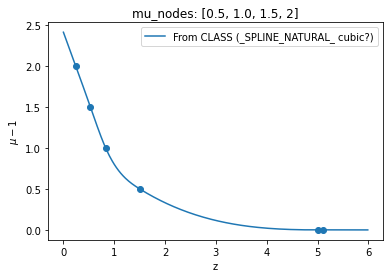

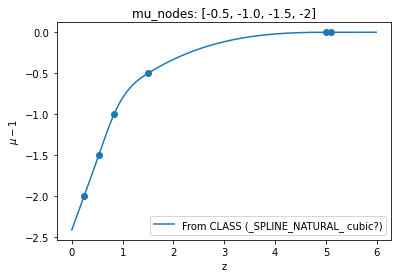

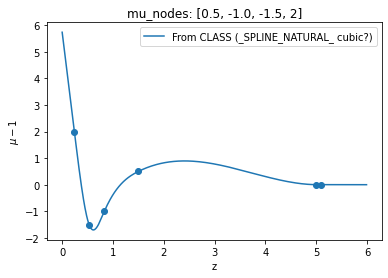

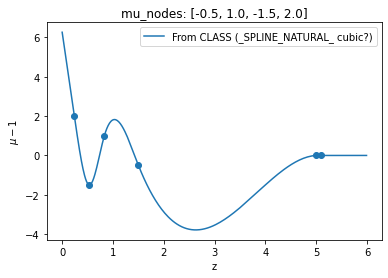

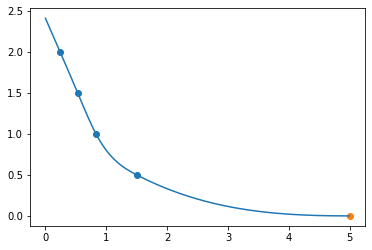

In [91]:
# Pedro and David's models
mu_arr = [
    [2, 1.5, 1.0, 0.5][::-1],
    [-2, -1.5, -1., -0.5][::-1],
    [2, -1.5, -1., 0.5][::-1],
    [2., -1.5, 1., -0.5][::-1]
]

for i, mu_i in enumerate(mu_arr):
    plot_dmu(mu_i.copy())
#     save_dmu_npz(mu_i.copy(), f'./mgclass_spline_case_{i}.npz')
    
file = np.load('./mgclass_spline_case_0.npz')
sel = file['z'] < file['z_anchor']
plt.scatter(file['z_nodes'], file['dmu_nodes'])
plt.scatter(file['z_anchor'], [0])
plt.plot(file['z'][sel], file['dmu'][sel])

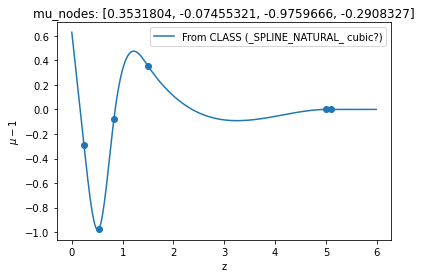

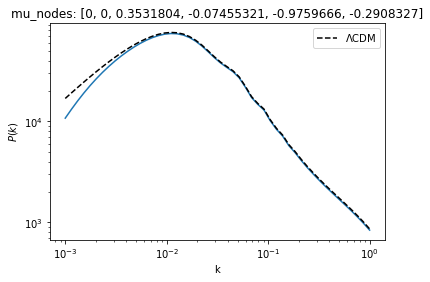

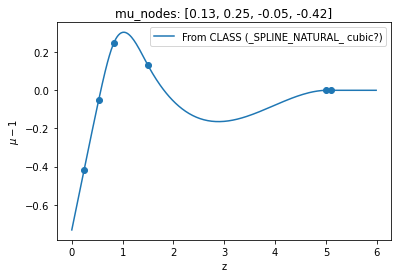

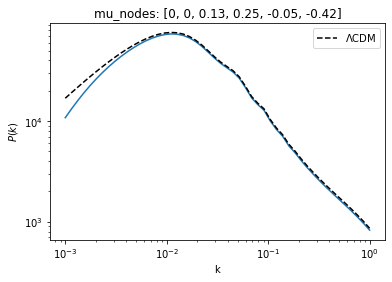

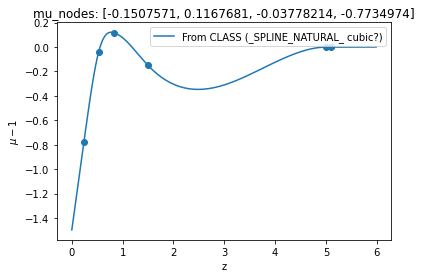

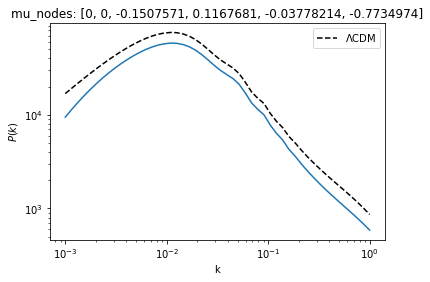

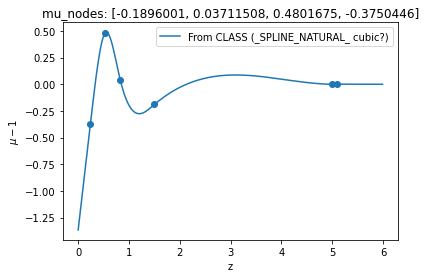

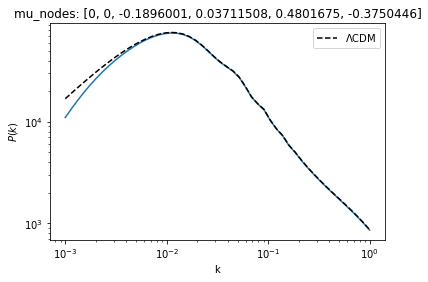

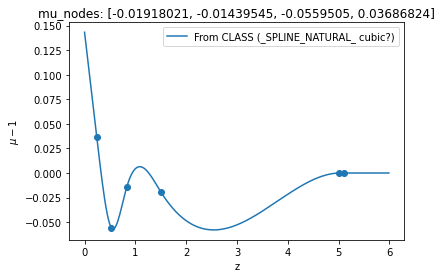

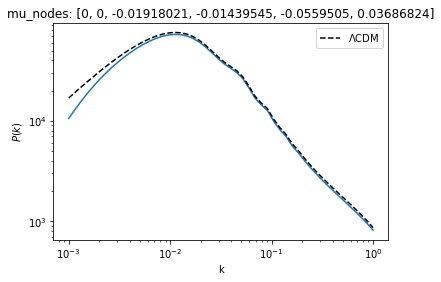

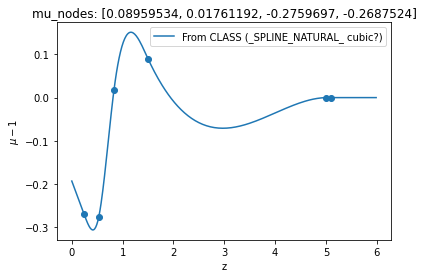

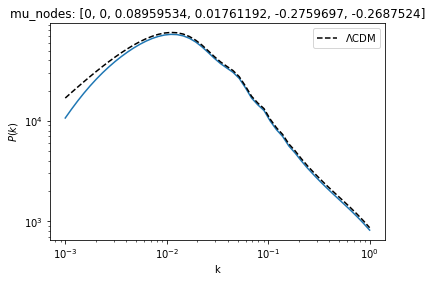

In [94]:
# From MP run with dSigma = dmu /2 + 1
mu_arr = [
    [3.531804e-01, -7.455321e-02, -9.759666e-01, -2.908327e-01], # BF (chi2/2 = 665.45)
    [-0.42, -0.05,  0.25,  0.13][::-1], # Mean values
    [-1.507571e-01,   1.167681e-01,    -3.778214e-02,   -7.734974e-01], # Random step with chi2/2 = 662.515
    [-1.896001e-01,   3.711508e-02,   4.801675e-01,   -3.750446e-01], # Step with chi2/2 = 700.318
    [-1.918021e-02,  -1.439545e-02,   -5.595050e-02,   3.686824e-02], # Step with chi2/2 = 781.431
    [8.959534e-02,    1.761192e-02,    -2.759697e-01,   -2.687524e-01], # Step with chi2/2 = 803.599
]

for i, mu_i in enumerate(mu_arr):
    plot_dmu(mu_i.copy(), perts=True, high_sigma_satisfy_prior=True)
#     save_dmu_npz(mu_i.copy(), f'./mgclass_spline_MP_case_{i}.npz')

0
Saving to ./mgclass_spline_MP_case_0_Sigma1.npz


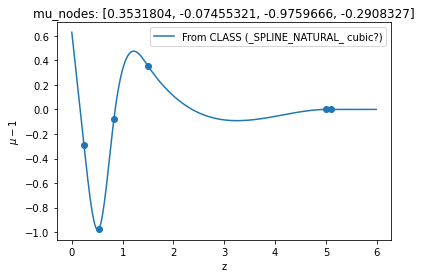

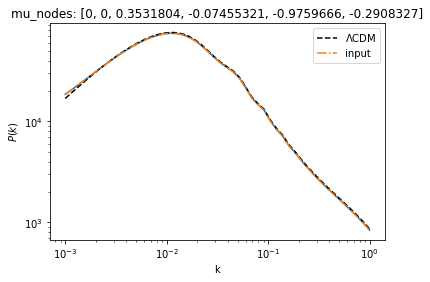


1
Saving to ./mgclass_spline_MP_case_1_Sigma1.npz


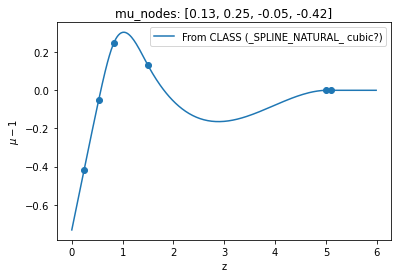

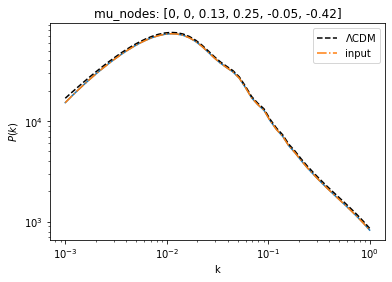


2
Saving to ./mgclass_spline_MP_case_2_Sigma1.npz


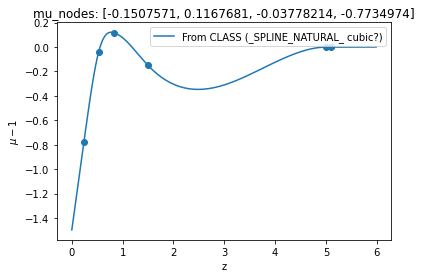

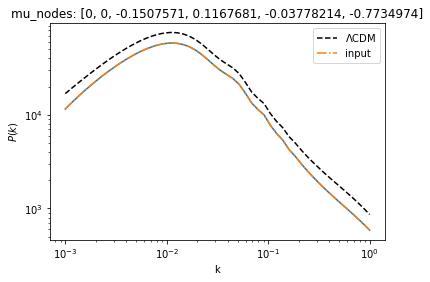


3
Saving to ./mgclass_spline_MP_case_3_Sigma1.npz


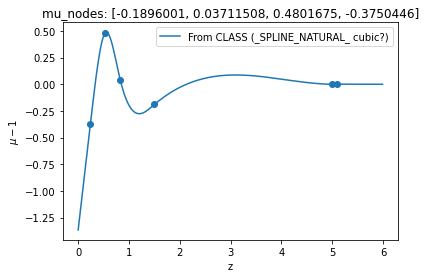

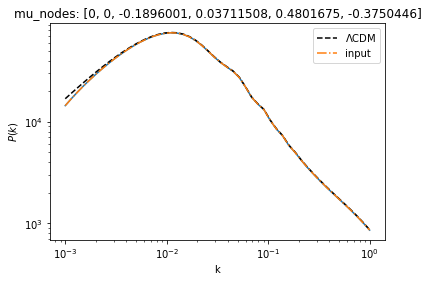


4
Saving to ./mgclass_spline_MP_case_4_Sigma1.npz


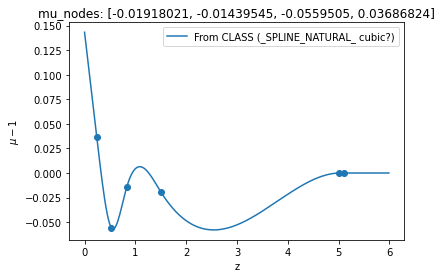

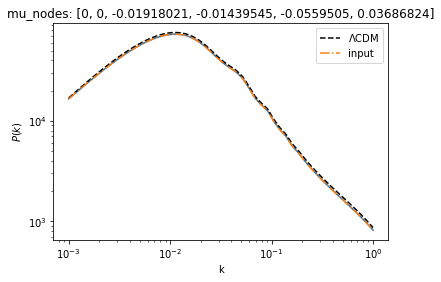


5
Saving to ./mgclass_spline_MP_case_5_Sigma1.npz


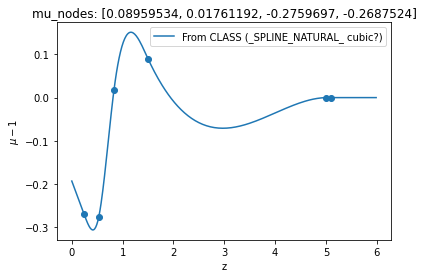

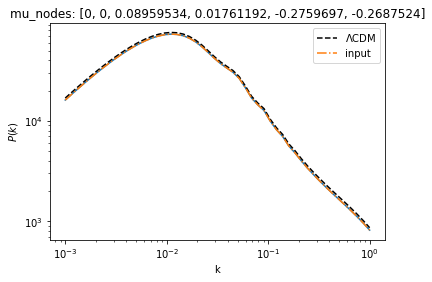

In [28]:
# From MP run but with Sigma=0
mu_arr = [
    [3.531804e-01, -7.455321e-02, -9.759666e-01, -2.908327e-01], # BF (chi2/2 = 665.45)
    [-0.42, -0.05,  0.25,  0.13][::-1], # Mean values
    [-1.507571e-01,   1.167681e-01,    -3.778214e-02,   -7.734974e-01], # Random step with chi2/2 = 662.515
    [-1.896001e-01,   3.711508e-02,   4.801675e-01,   -3.750446e-01], # Step with chi2/2 = 700.318
    [-1.918021e-02,  -1.439545e-02,   -5.595050e-02,   3.686824e-02], # Step with chi2/2 = 781.431
    [8.959534e-02,    1.761192e-02,    -2.759697e-01,   -2.687524e-01], # Step with chi2/2 = 803.599
]

for i, mu_i in enumerate(mu_arr):
    try:
        print(i)
#         save_dmu_npz(mu_i.copy(), f'./mgclass_spline_MP_case_{i}_Sigma1.npz', sigma_nodes=[0, 0, 0, 0])
        cf = np.load(f'mgclass_spline_MP_case_{i}_Sigma1.npz')
        plot_dmu(mu_i.copy(), perts=True,
                 sigma_nodes=[0, 0, 0, 0],
                 add_pk_arr=(cf['k'], cf['pk']))
        print()
    except Exception as e:
        print(str(e))
        continue

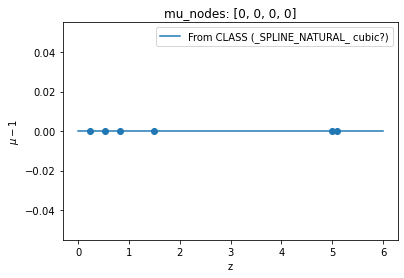

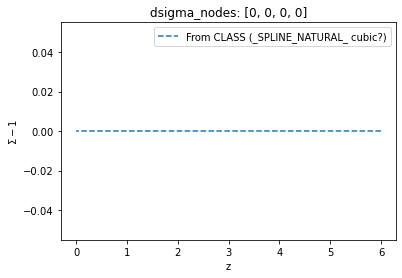

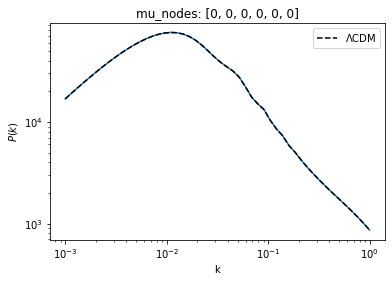

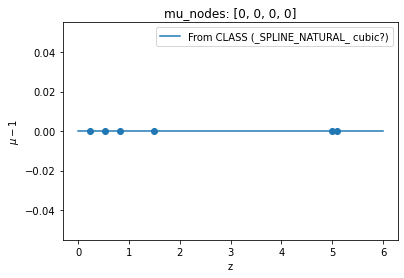

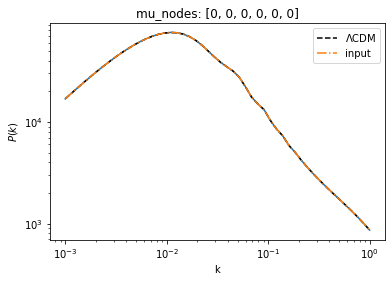

In [90]:
# LCDM
mu_i = [0, 0, 0, 0]
i = 'lcdm'
plot_dmu(mu_i.copy(), perts=True, high_sigma_satisfy_prior=True, plot_Sigma=True, lcdm=True)
# save_dmu_npz(mu_i.copy(), f'./mgclass_spline_MP_case_{i}.npz', lcdm=True)
cf = np.load('mgclass_spline_MP_case_lcdm.npz')
plot_dmu(mu_i.copy(), perts=True, high_sigma_satisfy_prior=True,
         lcdm=True, add_pk_arr=(cf['k'], cf['pk']))

## Check derivatives

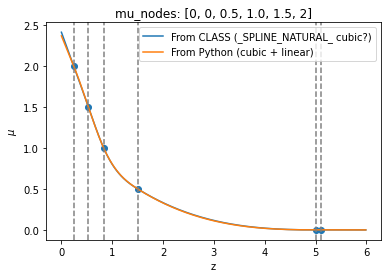

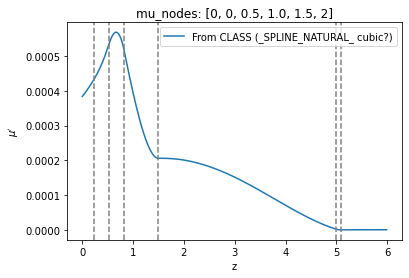

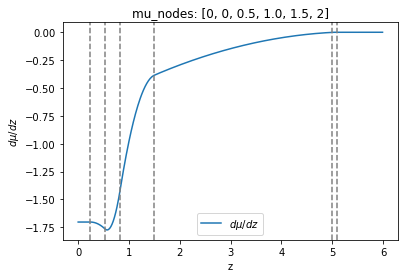

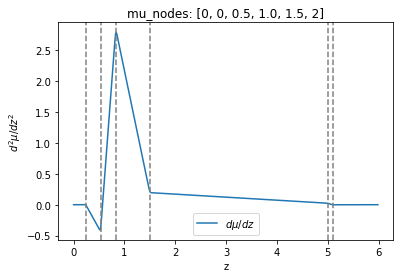

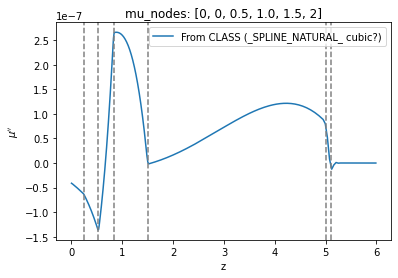

In [10]:
def plot_dmu_derivatives(mu_nodes=[0.5, 1.0, 1.5, 2], perts=False):
    # def plot_dmu(mu_nodes=[0.5, 1.0, 1.5, 2], perts=False):
    z_anchor = 5

    # Nodes need to be ordered in decreasing z
    z_nodes = [0.24, 0.53, 0.83, 1.5, z_anchor, z_anchor+0.1][::-1]
    # Add anchor in array of mu
    mu_nodes.insert(0, 0)
    mu_nodes.insert(0, 0)
    # dsigma spline not implemented yet
    sigma_nodes = mu_nodes


    params = {'H0': 67.5,
              'omega_b': 0.022,
              'omega_cdm': 0.122,
              'tau_reio': 0.06,
              'A_s': 2e-9,
              'n_s': 0.965, 
              'Omega_Lambda': 0, 
              'Omega_fld': 0, 
              'Omega_smg': -1, 
              'expansion_model': 'lcdm',
              'expansion_smg': '0.7',
              'gravity_model': 'mgclass_spline', 
              'mgclass_spline_z_anchor_smg': z_anchor,
              'mgclass_spline_size_smg': len(z_nodes) - 2,
              'mgclass_spline_z_smg': str(z_nodes[2:]).strip('[]'),
              'mgclass_spline_dmu_smg': str(mu_nodes[2:]).strip('[]'),
              # dsigma spline not implemented yet
              'mgclass_spline_dsigma_smg':  str(sigma_nodes[2:]).strip('[]'),
              'use_Sigma': 'y',
              'output_background_smg': 10}
    if perts:
        params.update({'output': 'mPk, mTk'})

    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    b = cosmo.get_background()

    z = b['z']
    tau = b['conf. time [Mpc]']
    dmu = b['mgclass_dmu']
    dmup = b['mgclass_dmu_prime']


    # Cubic
    interp = interp1d(z_nodes, mu_nodes, kind='cubic',
                          fill_value='extrapolate', bounds_error=False)
    dmu_python = interp(z)
    dmu_python[z > z_nodes[0]] = 0
    dmu_python[z < z_nodes[-1]] = interp1d([z_nodes[-1], z_nodes[-1] + 0.01], [mu_nodes[-1], interp(z_nodes[-1] + 0.01)],
                                           kind='slinear', fill_value='extrapolate', bounds_error=False)(z[z < z_nodes[-1]])


    #### Plots

    sel = z < z_anchor + 1
    
    plt.scatter(z_nodes, mu_nodes)
    plt.plot(z[sel], dmu[sel], label='From CLASS (_SPLINE_NATURAL_ cubic?)')
    plt.plot(z[sel], dmu_python[sel], label='From Python (cubic + linear)')
    for zi in z_nodes:
        plt.axvline(zi, ls='--', color='gray')
    plt.xlabel('z')
    plt.ylabel(r"$\mu$")
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes}')
    plt.show()
    plt.close()

    ###
    plt.plot(z[sel], dmup[sel], label='From CLASS (_SPLINE_NATURAL_ cubic?)')
    for zi in z_nodes:
        plt.axvline(zi, ls='--', color='gray')
    plt.xlabel('z')
    plt.ylabel(r"$\mu'$")
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes}')
    plt.show()
    plt.close()

    plt.plot(z[sel], np.gradient(dmu, z)[sel], label=r'$d\mu/dz$')
    # plt.plot(z[sel], np.gradient(dmu_python, z)[sel], label=r'$d\mu_python/dz$')
    for zi in z_nodes:
        plt.axvline(zi, ls='--', color='gray')
    plt.xlabel('z')
    plt.ylabel(r"$d\mu / dz$")
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes}')
    plt.show()
    plt.close()

    plt.plot(z[sel], np.gradient(np.gradient(dmu, z), z)[sel], label=r'$d\mu/dz$')
    # plt.plot(z[sel], np.gradient(dmu_python, z)[sel], label=r'$d\mu_python/dz$')
    for zi in z_nodes:
        plt.axvline(zi, ls='--', color='gray')
    plt.xlabel('z')
    plt.ylabel(r"$d^2\mu / dz^2$")
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes}')
    plt.show()
    plt.close()

    ###
    plt.plot(z[sel], np.gradient(dmup, tau)[sel], label='From CLASS (_SPLINE_NATURAL_ cubic?)')
    for zi in z_nodes:
        plt.axvline(zi, ls='--', color='gray')
    plt.xlabel('z')
    plt.ylabel(r"$\mu''$")
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes}')
    plt.show()
    plt.close()
    
plot_dmu_derivatives()

## Check Pk

[1.0, 1.0, 1.25, 1.5, 1.75, 2.0]


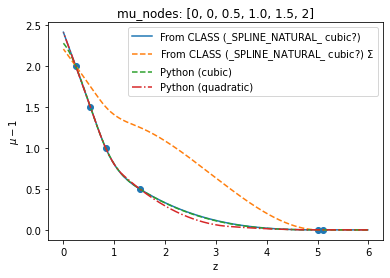

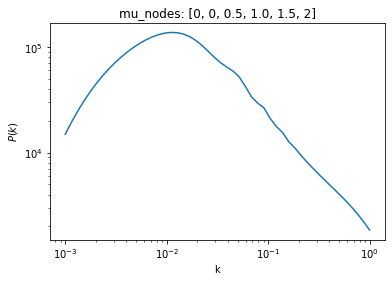

[1.0, 1.0, 0.75, 0.5, 0.25, 0.0]


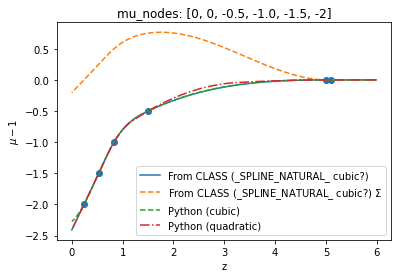

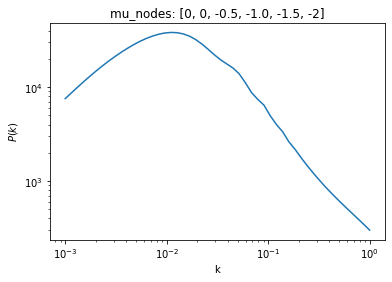

[1.0, 1.0, 1.25, 0.5, 0.25, 2.0]


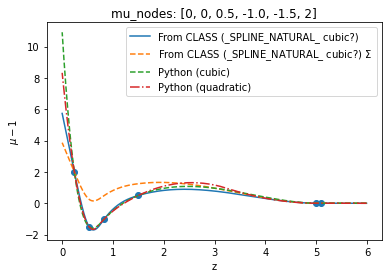

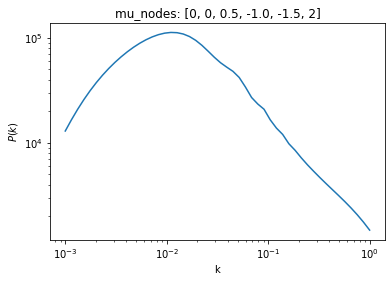

[1.0, 1.0, 0.75, 1.5, 0.25, 2.0]


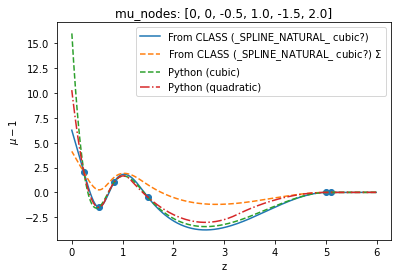

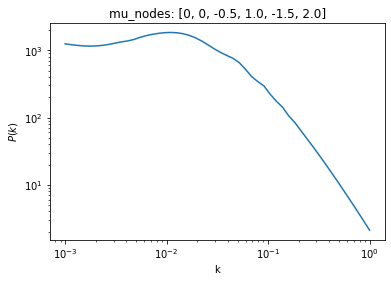

In [51]:
mu_arr = [
    [2, 1.5, 1.0, 0.5][::-1],
    [-2, -1.5, -1., -0.5][::-1],
    [2, -1.5, -1., 0.5][::-1],
    [2., -1.5, 1., -0.5][::-1]
]
for mu_i in mu_arr:
    try:
        plot_dmu(mu_i, perts=True, prior=True, high_sigma_satisfy_prior=True)
    except Exception as e:
        print(mu_i)
        print(str(e))
        print()
        print()

[1.0, 1.0, 0.75, 1.5, 0.25, 2.0]


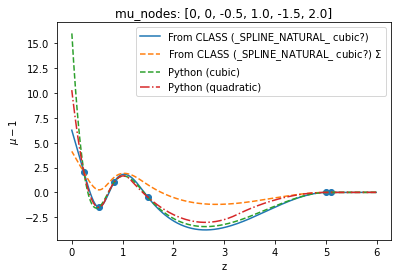

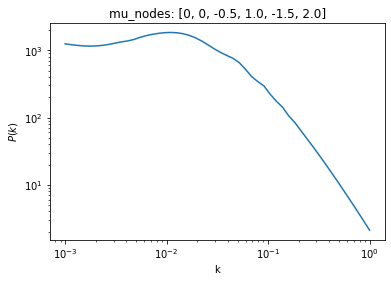

[2.0, 2.0, 1.75, 2.5, 1.25, 3.0]


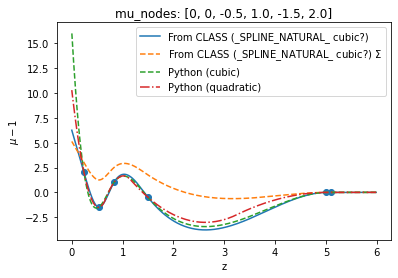

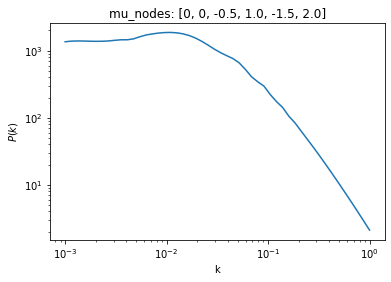

In [49]:
#Check Sigma doesn't change the Pk
plot_dmu(mu_nodes=[2., -1.5, 1., -0.5][::-1], perts=True, prior=True, high_sigma_satisfy_prior=True)
plot_dmu(mu_nodes=[2., -1.5, 1., -0.5][::-1], perts=True, prior=True, high_sigma_satisfy_prior=True, sigma_p1=True)

## Check cosmo.dmu and cosmo.dSigma

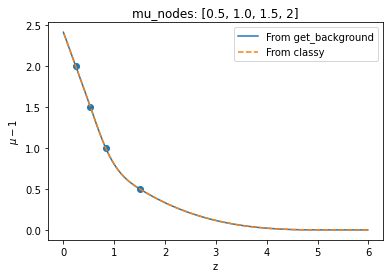

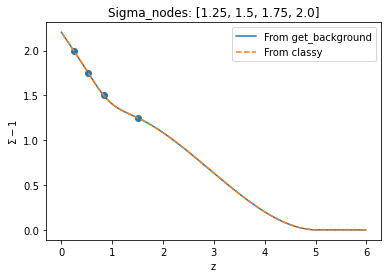

In [14]:
def check_classy():
    mu_nodes=[0.5, 1.0, 1.5, 2]
    z_anchor = 5
    
    # Nodes need to be ordered in decreasing z
    z_nodes = [0.24, 0.53, 0.83, 1.5][::-1]
    sigma_nodes = list(np.array(mu_nodes) / 2 + 1)

    params = {'H0': 67.5,
              'omega_b': 0.022,
              'omega_cdm': 0.122,
              'tau_reio': 0.06,
              'A_s': 2e-9,
              'n_s': 0.965, 
              'Omega_Lambda': 0, 
              'Omega_fld': 0, 
              'Omega_smg': -1, 
              'expansion_model': 'lcdm',
              'expansion_smg': '0.7',
              'gravity_model': 'mgclass_spline', 
              'mgclass_spline_z_anchor_smg': z_anchor,
              'mgclass_spline_size_smg': len(z_nodes),
              'mgclass_spline_z_smg': str(z_nodes).strip('[]'),
              'mgclass_spline_dmu_smg': str(mu_nodes).strip('[]'),
              # dsigma spline not implemented yet
              'mgclass_spline_dsigma_smg':  str(sigma_nodes).strip('[]'),
              'use_Sigma': 'y',
              'output': 'mPk, mTk',
              'non linear': 'halofit'}

    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    b = cosmo.get_background()

    z = b['z']
    dmu = b['mgclass_dmu']
    dSigma = b['mgclass_dSigma']
    
    dmu_classy = np.array([cosmo.dmu(zi) for zi in z])
    dSigma_classy = np.array([cosmo.dSigma(zi) for zi in z])
    
    assert np.all(dmu == dmu_classy)
    assert np.all(dSigma == dSigma_classy)

    sel = z < z_anchor + 1
    plt.scatter(z_nodes, mu_nodes)
    plt.plot(z[sel], dmu[sel], label='From get_background')
    plt.plot(z[sel], dmu_classy[sel], '--', label='From classy')
    plt.xlabel('z')
    plt.ylabel(r'$\mu - 1$')
    plt.legend()
    plt.title(f'mu_nodes: {mu_nodes}')
    plt.show()
    plt.close()
    
    plt.scatter(z_nodes, sigma_nodes)
    plt.plot(z[sel], dSigma[sel], label='From get_background')
    plt.plot(z[sel], dSigma_classy[sel], '--', label='From classy')
    plt.xlabel('z')
    plt.ylabel(r'$\Sigma - 1$')
    plt.legend()
    plt.title(f'Sigma_nodes: {sigma_nodes}')
    plt.show()
    plt.close()
    
check_classy()

In [ ]:
# 

# CMB $C_\ell$

/tmp/ipykernel_124231/625300142.py:52: RuntimeWarning: invalid value encountered in divide
  ax[1].semilogx(ell_class[2:], (cl_class['tt']/cl_class_gr['tt'] - 1)[2:], label=f'$\mu = {mu}$')


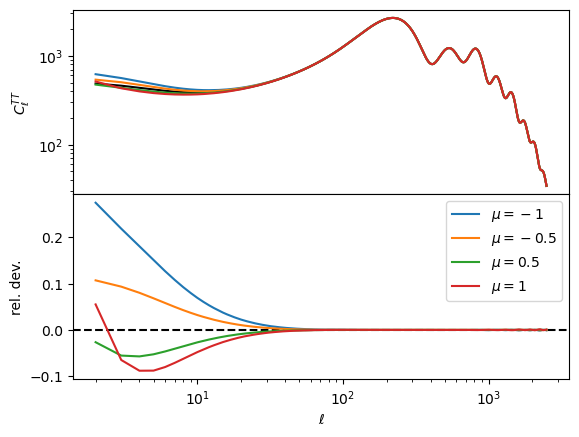

In [17]:
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_fs', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

cl_class_gr = cl_class = cosmo.lensed_cl()
ell_class = cl_class['ell']
factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi))  * (cosmo.T_cmb() * 1e6) ** 2.

ax[0].loglog(ell_class[2:], (factor_class * cl_class['tt'])[2:], label=f'$\mu = {mu}$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\mu = {mu}$')

for mu in [-1, -0.5, 0.5, 1]:
    cosmo.set({'parameters_smg': f"{mu}, 0"})
    try:
        cosmo.compute()
    except CosmoComputationError as e:
        print('parameters_smg', cosmo.pars['parameters_smg'])
        print(e)
        print()
        continue

    cl_class = cosmo.lensed_cl()
    ell_class = cl_class['ell']
    factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi))  * (cosmo.T_cmb() * 1e6) ** 2.

    ax[0].loglog(ell_class[2:], (factor_class * cl_class['tt'])[2:], label=f'$\mu = {mu}$')
    ax[1].semilogx(ell_class[2:], (cl_class['tt']/cl_class_gr['tt'] - 1)[2:], label=f'$\mu = {mu}$')

ax[0].set_ylabel(r"$C_\ell^{TT}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$\ell$")
ax[1].legend()
plt.show()
plt.close()

parameters_smg -1, 0


Error in Class: nonlinear_init(L:1511) :error in nonlinear_hmcode(ppr, pba, ppt, ppm, pnl, index_pk, index_tau, pnl->tau[index_tau], pk_nl[index_pk], lnpk_l, ddlnpk_l, &(pnl->k_nl[index_pk][index_tau]), &nl_corr_not_computable_at_this_k, pnw);
=>nonlinear_hmcode(L:3364) :error in array_interpolate_two_arrays_one_column( nu_arr, r_real, 1, 0, ppr->nsteps_for_p1h_integral, nu_nl, &r_nl, pnl->error_message);
=>array_interpolate_two_arrays_one_column(L:2809) :condition (x > array_x[sup]+epsilon) is true; x=1.000000e+00 > x_max=3.557056e-03



/tmp/ipykernel_76205/2047425992.py:53: RuntimeWarning: invalid value encountered in divide
  ax[1].semilogx(ell_class[2:], (cl_class['pp']/cl_class_gr['pp'] - 1)[2:], color=color, label=f'$\mu = {mu}$')


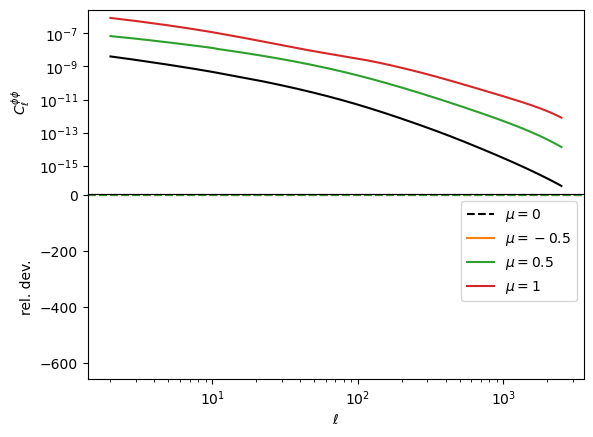

In [19]:
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_const', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

cl_class_gr = cl_class = cosmo.lensed_cl()
ell_class = cl_class['ell']
factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi)) #* (cosmo.T_cmb() * 1e6) ** 2.

ax[0].loglog(ell_class[2:], (factor_class * cl_class['pp'])[2:], label=f'$\mu = 0$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\mu = 0$')

for mu, color in zip([-1, -0.5, 0.5, 1], colors):
    cosmo.set({'parameters_smg': f"{mu}, 0"})
    try:
        cosmo.compute()
    except CosmoComputationError as e:
        print('parameters_smg', cosmo.pars['parameters_smg'])
        print(e)
        print()
        continue

    cl_class = cosmo.lensed_cl()
    ell_class = cl_class['ell']
    factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi))  #* (cosmo.T_cmb() * 1e6) ** 2.

    ax[0].loglog(ell_class[2:], (factor_class * cl_class['pp'])[2:], color=color, label=f'$\mu = {mu}$')
    ax[1].axhline((mu+1)**2 - 1, ls='--', color=color)    
    ax[1].semilogx(ell_class[2:], (cl_class['pp']/cl_class_gr['pp'] - 1)[2:], color=color, label=f'$\mu = {mu}$')

ax[0].set_ylabel(r"$C_\ell^{\phi\phi}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$\ell$")
ax[1].legend()
ax[1].set_ylim([None, 3])
plt.show()
plt.close()

parameters_smg 0, -0.6


Error in Class: perturb_init(L:840) :error in perturb_solve(ppr, pba, pth, ppt, index_md, index_ic, index_k, pppw[thread]);
=>perturb_solve(L:3232) :error in generic_evolver(perturb_derivs, interval_limit[index_interval], interval_limit[index_interval+1], ppw->pv->y, ppw->pv->used_in_sources, ppw->pv->pt_size, &ppaw, ppr->tol_perturb_integration, ppr->smallest_allowed_variation, perturb_timescale, ppr->perturb_integration_stepsize, ppt->tau_sampling, tau_actual_size, perturb_sources, perhaps_print_variables, ppt->error_message);
=>evolver_ndf15(L:469) :condition (absh <= hmin) is true; Step size too small: step:2.46576e-15, minimum:2.46576e-15, in interval: [5.137e-05:1.5411]




/tmp/ipykernel_88653/4210766216.py:53: RuntimeWarning: invalid value encountered in divide
  ax[1].semilogx(ell_class[2:], (cl_class['pp']/cl_class_gr['pp'] - 1)[2:], color=color, label=f'$\Sigma -1 = {Sigma}$')


parameters_smg 0, 0.5


Error in Class: nonlinear_init(L:1511) :error in nonlinear_hmcode(ppr, pba, ppt, ppm, pnl, index_pk, index_tau, pnl->tau[index_tau], pk_nl[index_pk], lnpk_l, ddlnpk_l, &(pnl->k_nl[index_pk][index_tau]), &nl_corr_not_computable_at_this_k, pnw);
=>nonlinear_hmcode(L:3408) :condition (counter > _MAX_IT_) is true; could not converge within maximum allowed number of iterations



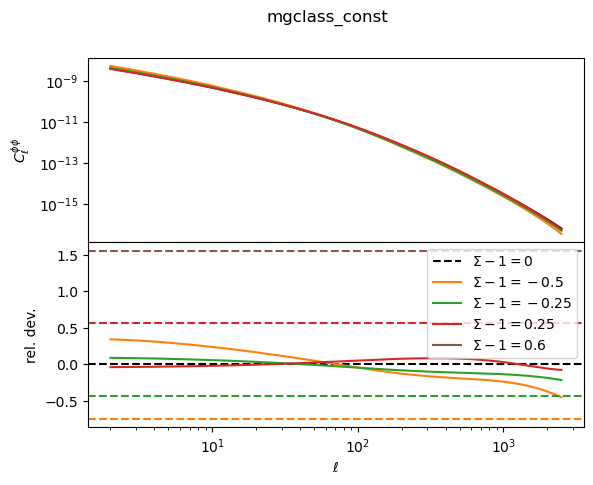

In [67]:
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_const', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

cl_class_gr = cl_class = cosmo.lensed_cl()
ell_class = cl_class['ell']
factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi)) # * (cosmo.T_cmb() * 1e6) ** 2.

ax[0].loglog(ell_class[2:], (factor_class * cl_class['pp'])[2:], label=f'$\Sigma -1 = 0$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\Sigma -1 = 0$')

for Sigma, color in zip([-0.6, -0.5, -0.25, 0.25, 0.5, 0.6], colors):
    cosmo.set({'parameters_smg': f"0, {Sigma}"})
    try:
        cosmo.compute()
    except CosmoComputationError as e:
        print('parameters_smg', cosmo.pars['parameters_smg'])
        print(e)
        print()
        continue

    cl_class = cosmo.lensed_cl()
    ell_class = cl_class['ell']
    factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi)) # * (cosmo.T_cmb() * 1e6) ** 2.

    ax[0].loglog(ell_class[2:], (factor_class * cl_class['pp'])[2:], color=color, label=f'$\Sigma -1 = {Sigma}$')
    ax[1].axhline((Sigma+1)**2 - 1, ls='--', color=color)
    ax[1].semilogx(ell_class[2:], (cl_class['pp']/cl_class_gr['pp'] - 1)[2:], color=color, label=f'$\Sigma -1 = {Sigma}$')

ax[0].set_ylabel(r"$C_\ell^{\phi\phi}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$\ell$")
ax[1].legend()
plt.suptitle("mgclass_const")
plt.show()
plt.close()

/tmp/ipykernel_88653/80965181.py:70: RuntimeWarning: invalid value encountered in divide
  ((cl_class['pp'] - cl_class_gr['pp'])/(cl_class_ref['pp'] - cl_class_gr['pp']))[2:],


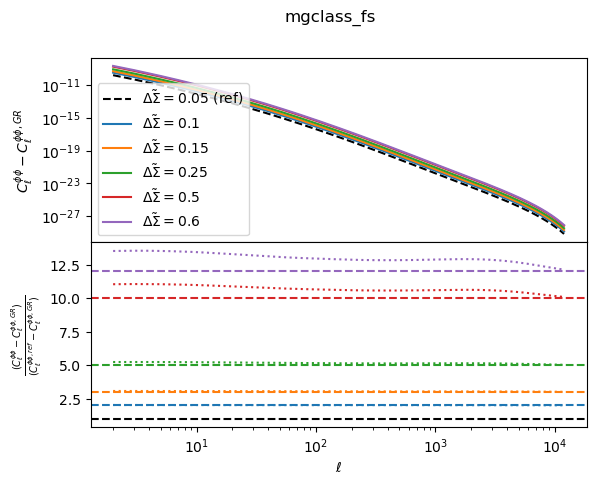

In [66]:
# Cell_phi-phi mgclass_fs
# Since Sigma = dSigma * Omega_de + 1 --> (Cell_1 - Cell_GR) / (Cell_2 - Cell_GR) ~ (dSigma_1 / dSigma_2) (if dSigma is small)
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_fs', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 12000,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

cl_class_gr = cl_class = cosmo.lensed_cl()
ell_class = cl_class['ell']
# factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi))

# ax[0].loglog(ell_class[2:], (factor_class * cl_class['pp'])[2:], label=f'$\Sigma -1 = 0$', color='k')
# ax[1].axhline(0, color='k', ls='--', label=f'$\Sigma -1 = 0$')

# Reference (dSigma = 0.1)
dSigma_ref = 0.05
cosmo.set({'parameters_smg': f"0, {dSigma_ref}"})
cosmo.compute()

cl_class_ref = cl_class = cosmo.lensed_cl()
ell_class = cl_class['ell']
# factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi))

ax[0].loglog(ell_class[2:], (cl_class_ref['pp'] - cl_class_gr['pp'])[2:],
             label=fr'$\tilde{{\Delta \Sigma}} = {dSigma_ref}$ (ref)', ls='--', color='k')
ax[1].axhline(1, color='k', ls='--', label=fr'$\tilde{{\Delta \Sigma}} = {dSigma_ref}$ (ref)')


for dSigma, color in zip([0.1, 0.15, 0.25, 0.5, 0.6], colors):
    cosmo.set({'parameters_smg': f"0, {dSigma}"})
    try:
        cosmo.compute()
    except CosmoComputationError as e:
        print('parameters_smg', cosmo.pars['parameters_smg'])
        print(e)
        print()
        continue

    cl_class = cosmo.lensed_cl()

    ax[0].loglog(ell_class[2:], (cl_class['pp'] - cl_class_gr['pp'])[2:],
                 color=color, label=fr'$\tilde{{\Delta \Sigma}} = {dSigma}$')
    
    ax[1].axhline((dSigma / dSigma_ref), ls='--', color=color)
    ax[1].semilogx(ell_class[2:],
                   ((cl_class['pp'] - cl_class_gr['pp'])/(cl_class_ref['pp'] - cl_class_gr['pp']))[2:],
                   color=color, ls=':', label=fr'$\tilde{{\Delta \Sigma}} = {dSigma}$')

ax[0].set_ylabel(r"$C_\ell^{\phi\phi} - C_\ell^{\phi\phi, GR}$")
ax[1].set_ylabel(r"$\frac{(C_\ell^{\phi\phi} - C_\ell^{\phi\phi, GR})}{(C_\ell^{\phi\phi, ref} - C_\ell^{\phi\phi, GR})}$")
ax[1].set_xlabel(r"$\ell$")
ax[0].legend()
plt.suptitle("mgclass_fs")
plt.show()
plt.close()

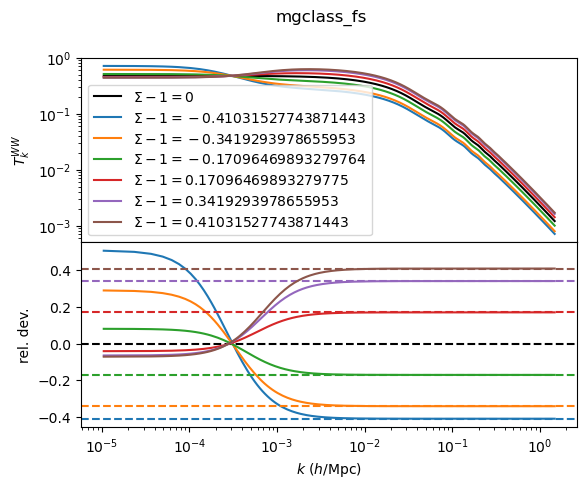

In [35]:
# Transfer functions (mgclass_fs)
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_fs', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

tk_gr = tk = cosmo.get_transfer()
tk_ww_gr = tk_ww = 0.5 * (tk['phi'] + tk['psi'])
k = tk['k (h/Mpc)']
sel = k<1/cosmo.h()

ax[0].loglog(k[sel], tk_ww[sel], label=f'$\Sigma -1 = 0$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\Sigma -1 = 0$')

for Sigma, color in zip([-0.6, -0.5, -0.25, 0.25, 0.5, 0.6], colors):
    cosmo.set({'parameters_smg': f"0, {Sigma}"})
    try:
        cosmo.compute()
    except CosmoComputationError as e:
        print('parameters_smg', cosmo.pars['parameters_smg'])
        print(e)
        print()
        continue
        
    tk = cosmo.get_transfer()
    tk_ww = 0.5 * (tk['phi'] + tk['psi'])
    
    b = cosmo.get_background()
    Omega_DE = b['(.)rho_smg'] / b['(.)rho_crit']
    Sigmaz = Sigma * Omega_DE[-1] + 1

    ax[0].loglog(k[sel], tk_ww[sel],  color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')
    ax[1].axhline(Sigmaz - 1, ls='--', color=color)
    ax[1].semilogx(k[sel], tk_ww[sel]/(tk_ww_gr[sel]) - 1, color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')

ax[0].set_ylabel(r"$T_k^{WW}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$k$ ($h$/Mpc)")
ax[0].legend()
plt.suptitle("mgclass_fs")
plt.show()
plt.close() 

parameters_smg 0, -0.6


Error in Class: perturb_init(L:840) :error in perturb_solve(ppr, pba, pth, ppt, index_md, index_ic, index_k, pppw[thread]);
=>perturb_solve(L:3232) :error in generic_evolver(perturb_derivs, interval_limit[index_interval], interval_limit[index_interval+1], ppw->pv->y, ppw->pv->used_in_sources, ppw->pv->pt_size, &ppaw, ppr->tol_perturb_integration, ppr->smallest_allowed_variation, perturb_timescale, ppr->perturb_integration_stepsize, ppt->tau_sampling, tau_actual_size, perturb_sources, perhaps_print_variables, ppt->error_message);
=>evolver_ndf15(L:469) :condition (absh <= hmin) is true; Step size too small: step:2.58197e-15, minimum:2.58197e-15, in interval: [5.3791e-05:1.61373]


parameters_smg 0, 0.5


Error in Class: nonlinear_init(L:1511) :error in nonlinear_hmcode(ppr, pba, ppt, ppm, pnl, index_pk, index_tau, pnl->tau[index_tau], pk_nl[index_pk], lnpk_l, ddlnpk_l, &(pnl->k_nl[index_pk][index_tau]), &nl_corr_not_computable_at_this_k, pnw);
=>nonlinear_hmcode

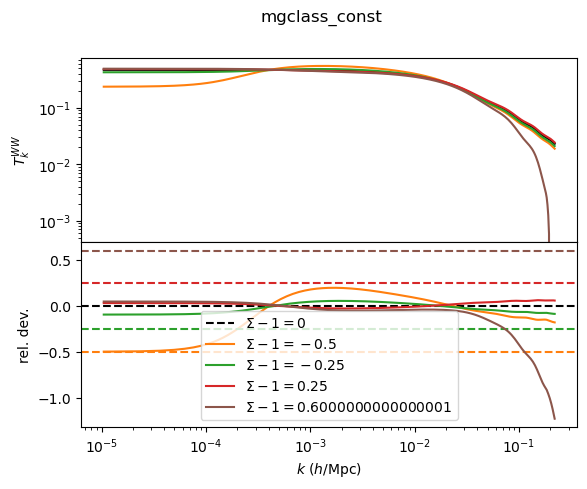

In [36]:
# Transfer functions (mgclass_const)
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_const', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

tk_gr = tk = cosmo.get_transfer()
tk_ww_gr = tk_ww = 0.5 * (tk['phi'] + tk['psi'])
k = tk['k (h/Mpc)']
sel = k<0.15/cosmo.h()

ax[0].loglog(k[sel], tk_ww[sel], label=f'$\Sigma -1 = 0$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\Sigma -1 = 0$')

for Sigma, color in zip([-0.6, -0.5, -0.25, 0.25, 0.5, 0.6], colors):
    cosmo.set({'parameters_smg': f"0, {Sigma}"})
    try:
        cosmo.compute()
    except CosmoComputationError as e:
        print('parameters_smg', cosmo.pars['parameters_smg'])
        print(e)
        print()
        continue
        
    tk = cosmo.get_transfer()
    tk_ww = 0.5 * (tk['phi'] + tk['psi'])
    
    Sigmaz = Sigma + 1

    ax[0].loglog(k[sel], tk_ww[sel],  color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')
    ax[1].axhline(Sigmaz - 1, ls='--', color=color)
    ax[1].semilogx(k[sel], tk_ww[sel]/(tk_ww_gr[sel]) - 1, color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')

ax[0].set_ylabel(r"$T_k^{WW}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$k$ ($h$/Mpc)")
ax[1].legend()
plt.suptitle("mgclass_const")
plt.show()
plt.close() 

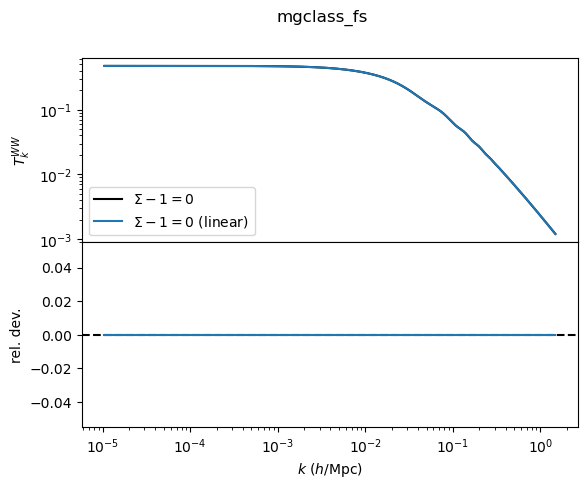

In [88]:
# Transfer functions (mgclass_fs)
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_fs', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0"})
cosmo.compute()

tk_gr = tk = cosmo.get_transfer()
tk_ww_gr = tk_ww = 0.5 * (tk['phi'] + tk['psi'])
k = k_gr = tk['k (h/Mpc)']
sel_gr = sel = k<1/cosmo.h()

ax[0].loglog(k[sel], tk_ww[sel], label=f'$\Sigma -1 = 0$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\Sigma -1 = 0$')

# GR no nonlinear
cosmo.set({'parameters_smg': f"0, 0", "non linear": "no"})
cosmo.compute()

tk = cosmo.get_transfer()
tk_ww = 0.5 * (tk['phi'] + tk['psi'])
k = tk['k (h/Mpc)']
from scipy.interpolate import interp1d

tk_ww = interp1d(k, tk_ww)(k_gr[sel_gr])

ax[0].loglog(k_gr[sel_gr], tk_ww, label=f'$\Sigma -1 = 0$ (linear)')
ax[1].semilogx(k_gr[sel_gr], tk_ww_gr[sel_gr] / tk_ww -1, label=fr'$\Sigma -1 = 0$ (linear)')

# for Sigma, color in zip([-0.6, -0.5, -0.25, 0.25, 0.5, 0.6], colors):
#     cosmo.set({'parameters_smg': f"0, {Sigma}"})
#     try:
#         cosmo.compute()
#     except CosmoComputationError as e:
#         print('parameters_smg', cosmo.pars['parameters_smg'])
#         print(e)
#         print()
#         continue
        
#     tk = cosmo.get_transfer()
#     tk_ww = 0.5 * (tk['phi'] + tk['psi'])
    
#     b = cosmo.get_background()
#     Omega_DE = b['(.)rho_smg'] / b['(.)rho_crit']
#     Sigmaz = Sigma * Omega_DE[-1] + 1

#     ax[0].loglog(k[sel], tk_ww[sel],  color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')
#     ax[1].axhline(Sigmaz - 1, ls='--', color=color)
#     ax[1].semilogx(k[sel], tk_ww[sel]/(tk_ww_gr[sel]) - 1, color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')

ax[0].set_ylabel(r"$T_k^{WW}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$k$ ($h$/Mpc)")
ax[0].legend()
plt.suptitle("mgclass_fs")
plt.show()
plt.close() 

/tmp/ipykernel_88653/639924348.py:48: RuntimeWarning: invalid value encountered in divide
  ax[1].semilogx(k_gr, tk_ww / tk_ww_gr -1, label=fr'$\Sigma -1 = 0$ (linear)')


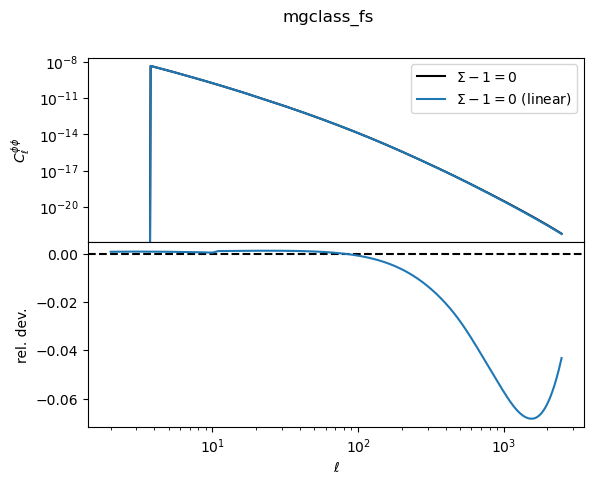

In [95]:
# Transfer functions (mgclass_fs)
parameters_smg = [0., 0.3]

params = {
    'gravity_model': 'mgclass_fs', 'use_Sigma': 'yes',
          'expansion_model': 'lcdm', 'Omega_Lambda': 0, 'Omega_fld': 0, 
          'Omega_smg': -1,
          'non linear': 'hmcode',
          'expansion_smg': 0.7, 'tau_reio': 0.08,
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk', 'z_max_pk': 7.125,
          'l_max_scalars': 2500,
          'P_k_max_1/Mpc': 9.989729240241573,
          'k_per_decade_for_pk': 200,
          'k_per_decade_for_bao': 200,
          'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 1.e-9,
          'n_s': 0.965}

cosmo = Class()
cosmo.set(params)
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})

# GR
cosmo.set({'parameters_smg': f"0, 0.1"})
cosmo.compute()

tk_gr = tk = cosmo.lensed_cl()
tk_ww_gr = tk_ww = tk['pp']
k = k_gr = tk['ell']
# sel_gr = sel = k<1/cosmo.h()

ax[0].loglog(k, tk_ww, label=f'$\Sigma -1 = 0$', color='k')
ax[1].axhline(0, color='k', ls='--', label=f'$\Sigma -1 = 0$')

# GR no nonlinear
cosmo.set({'parameters_smg': f"0, 0.1", "non linear": "no"})
cosmo.compute()

tk = cosmo.lensed_cl()
tk_ww = tk['pp']
k = tk['ell']

ax[0].loglog(k_gr, tk_ww, label=f'$\Sigma -1 = 0$ (linear)')
ax[1].semilogx(k_gr, tk_ww / tk_ww_gr -1, label=fr'$\Sigma -1 = 0$ (linear)')

# for Sigma, color in zip([-0.6, -0.5, -0.25, 0.25, 0.5, 0.6], colors):
#     cosmo.set({'parameters_smg': f"0, {Sigma}"})
#     try:
#         cosmo.compute()
#     except CosmoComputationError as e:
#         print('parameters_smg', cosmo.pars['parameters_smg'])
#         print(e)
#         print()
#         continue
        
#     tk = cosmo.get_transfer()
#     tk_ww = 0.5 * (tk['phi'] + tk['psi'])
    
#     b = cosmo.get_background()
#     Omega_DE = b['(.)rho_smg'] / b['(.)rho_crit']
#     Sigmaz = Sigma * Omega_DE[-1] + 1

#     ax[0].loglog(k[sel], tk_ww[sel],  color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')
#     ax[1].axhline(Sigmaz - 1, ls='--', color=color)
#     ax[1].semilogx(k[sel], tk_ww[sel]/(tk_ww_gr[sel]) - 1, color=color, label=f'$\Sigma -1 = {Sigmaz-1}$')

ax[0].set_ylabel(r"$C_\ell^{\phi\phi}$")
ax[1].set_ylabel("rel. dev.")
ax[1].set_xlabel(r"$\ell$")
ax[0].legend()
plt.suptitle("mgclass_fs")
plt.show()
plt.close() 

In [85]:
k_gr[sel_gr].shape, tk_ww.shape, tk_ww_gr[sel_gr].shape

((658,), (658,), (658,))